# Customer Churn Analysis and Prediction

#### Project Overview

 - Customer churn refers to the phenomenon where customers stop doing business with a company or stop using its services. In simple terms, it's when customers leave or "churn away" from a business, often switching to a competitor or just stopping their use of the service altogether. It's an important metric for companies because retaining existing customers is typically more cost-effective than acquiring new ones, so high churn rates can negatively impact a company's revenue and growth.

 - The data used in this project is a dataset obtained from Kaggle(a telco dataset).  
   The aim of thos project seeeks to analyse the churn rate of customers of this organisation based on certain features. 
   Amongst such features include;
     Whether or not the customer is a senior citizen.
     Whether the customer has a partner, dependents.
     The tenure of use of the customer etc.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Reading the data 
data = pd.read_csv('CustomerChurn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Checking the shape(dimension) of the data
data.shape

(7043, 21)

In [4]:
# The columns in the data set are listed below;
for column in data.columns:
    print (column)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [5]:
# Getting basic information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.head(2)
pd.options.display.max_columns

20

In [7]:
# checking the data types of all columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- Senior Citizen is not considered numerical because it is more orr less of a categorical(boolean) feature
- 75% of the customers have tenure less than 55 months 

In [8]:
# checking for customers who churned 
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
(data['Churn'].value_counts()/ len(data))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

- Customer churn rate is 26.54% which is slightly above a quarter

([<matplotlib.patches.Wedge at 0x21e52f2be20>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'Not Churned'),
  Text(0.7393677515287918, -0.8144540060674139, 'Churned')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

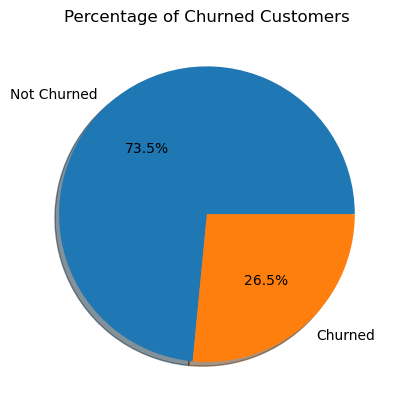

In [10]:
# Visualising number of customers who have churned 
plt.title('Percentage of Churned Customers')
plt.pie(x= data['Churn'].value_counts(), 
        autopct= '%1.1f%%', labels=['Not Churned', 'Churned'], shadow= True)

<AxesSubplot:title={'center':'Distribution of Churned Customers'}, xlabel='Churn', ylabel='count'>

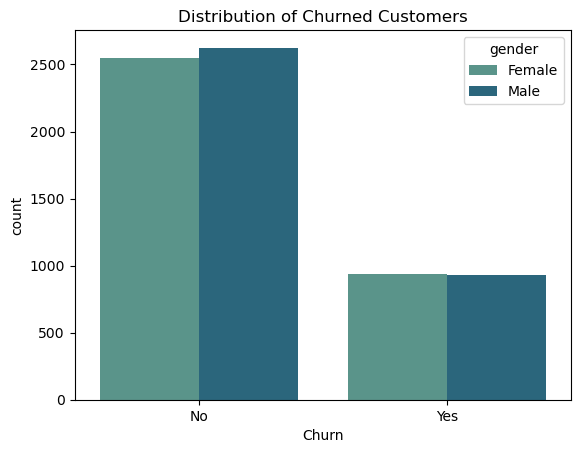

In [11]:
plt.title('Distribution of Churned Customers')
sns.countplot(x= data['Churn'], hue= data['gender'], palette='crest')

- There is no significant difference between males and females who have churned

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning 

In [13]:
df = data.copy()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [16]:
# Converting the 'Total Charges' column into an appropriate data type
df['TotalCharges'] = df['TotalCharges'].astype('int', errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
# Missing Value treatment
df.dropna(how = 'any', inplace=True)

In [18]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:title={'center':'Distribution of Tenure'}, xlabel='Tenure', ylabel='Density'>

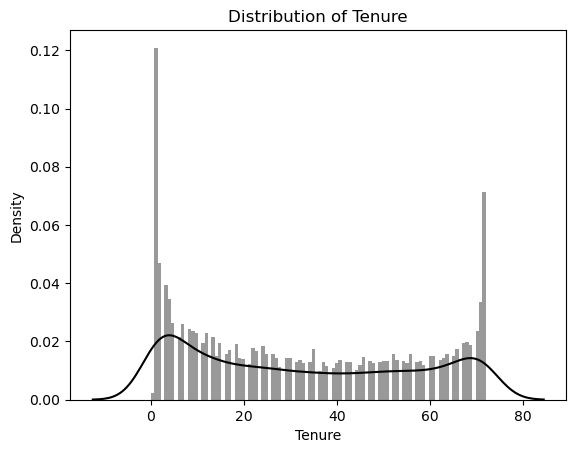

In [19]:
# Visualising the distribution of tenure 
import warnings
warnings.filterwarnings(action= 'ignore')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
sns.distplot(x= df['tenure'], color= 'black', bins= 100)

## Data Analysis

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Univariate Analysis

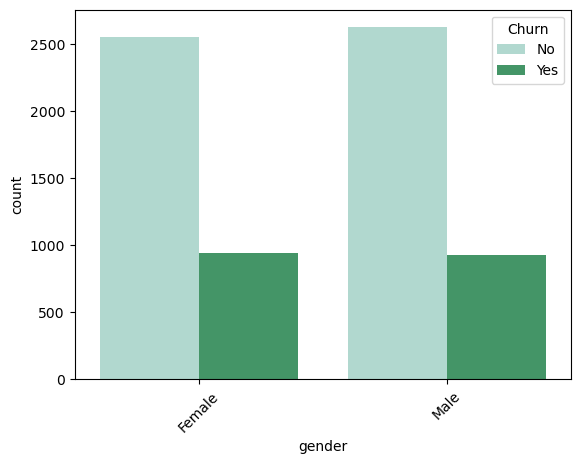

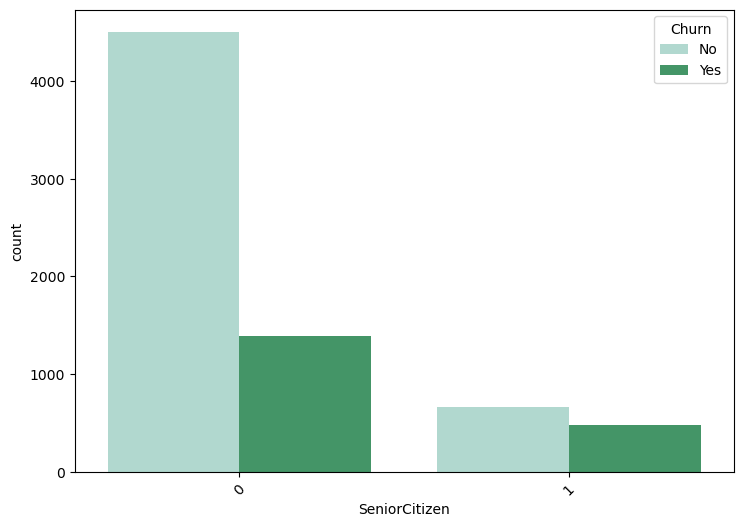

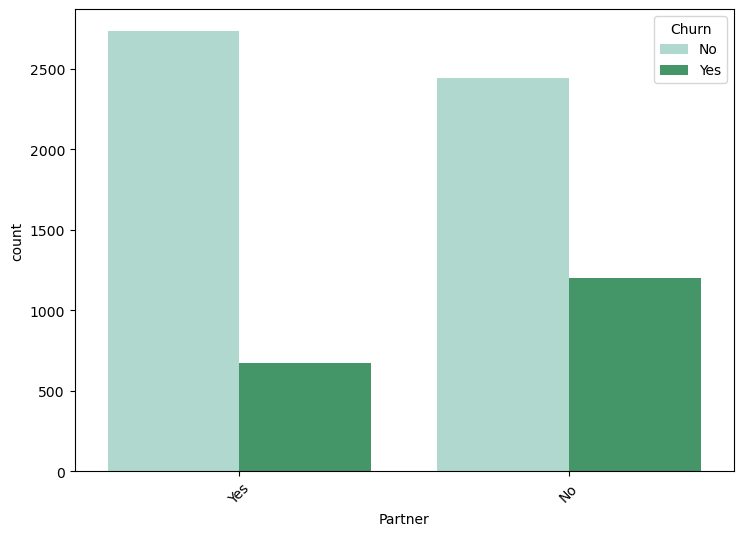

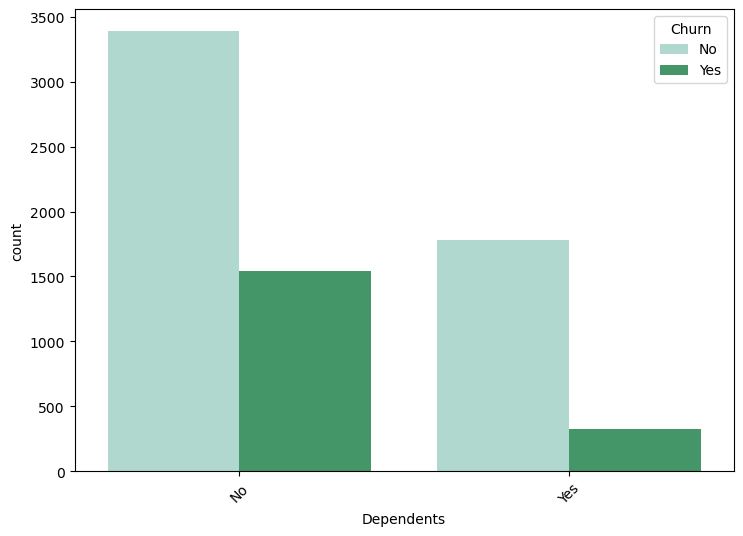

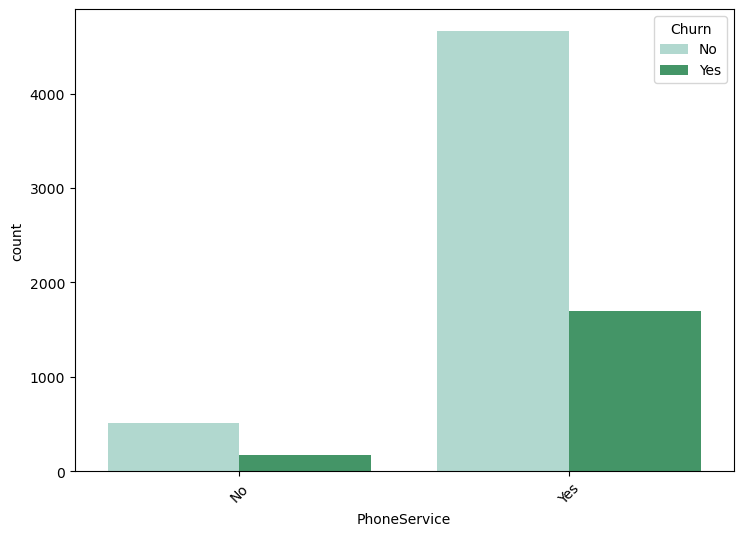

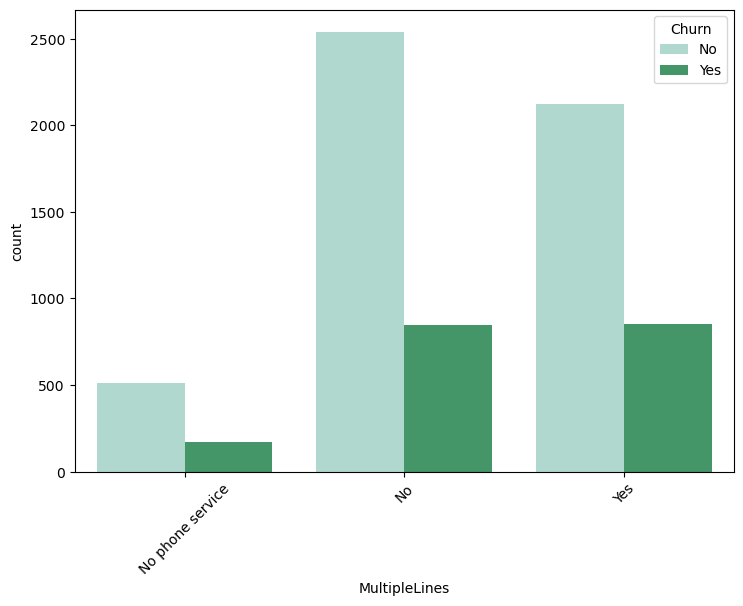

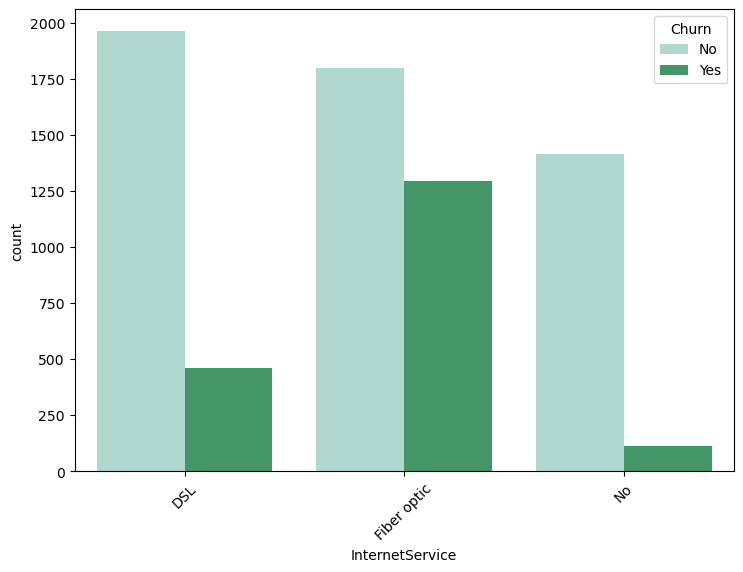

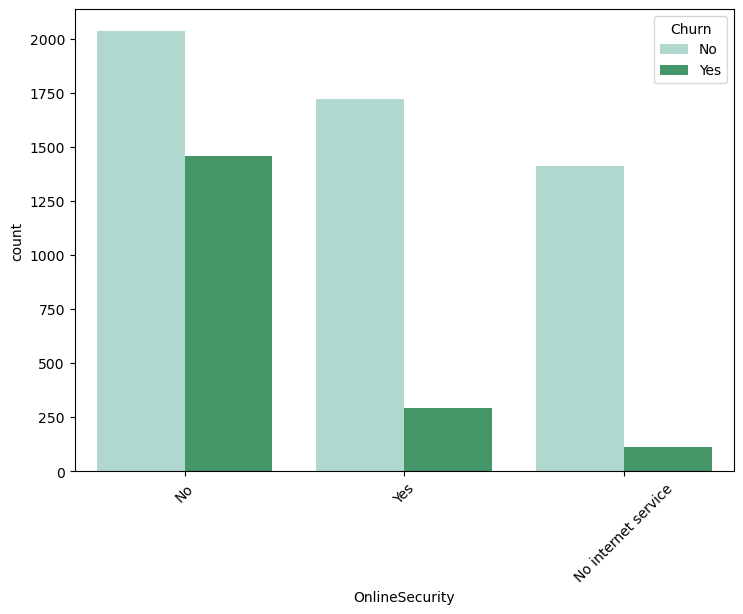

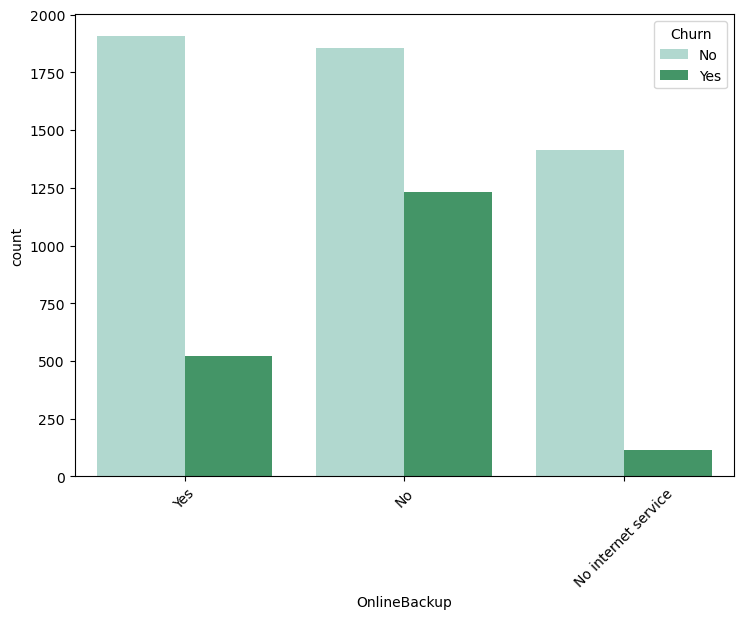

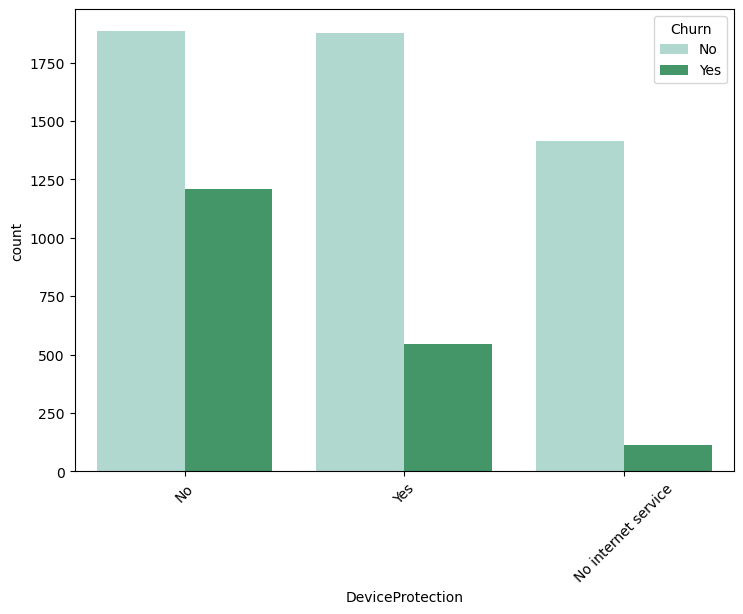

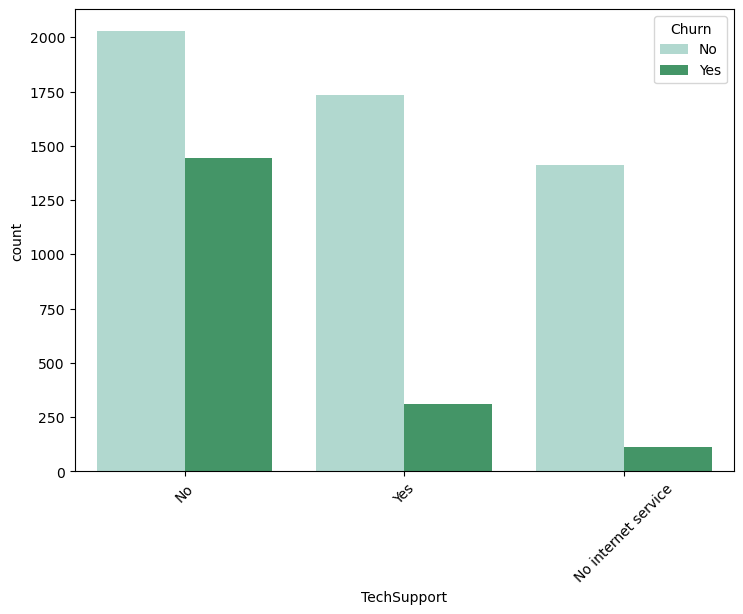

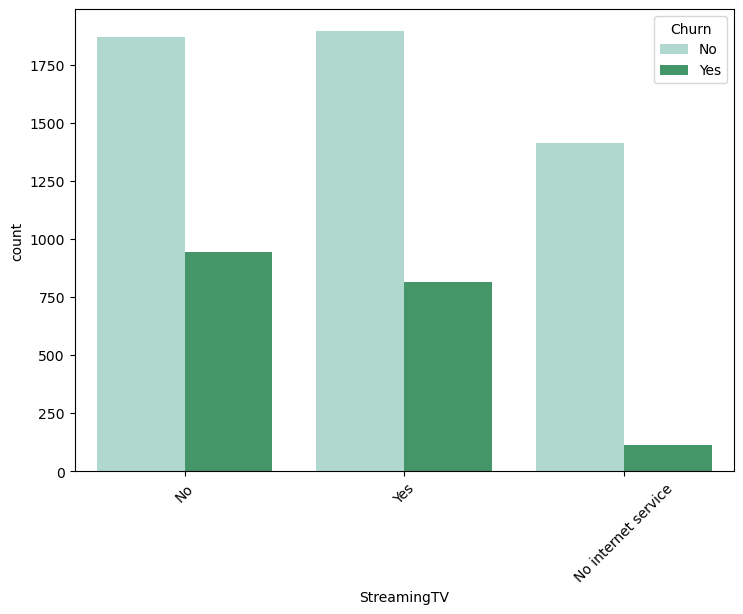

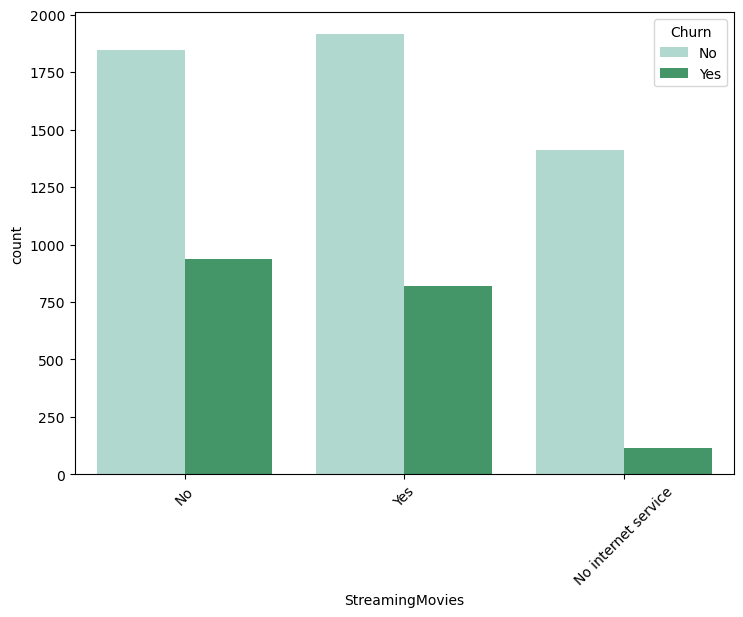

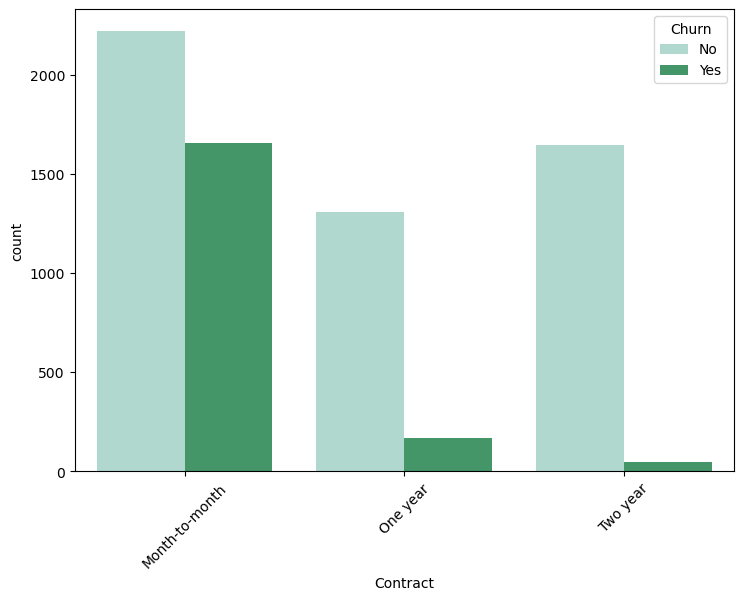

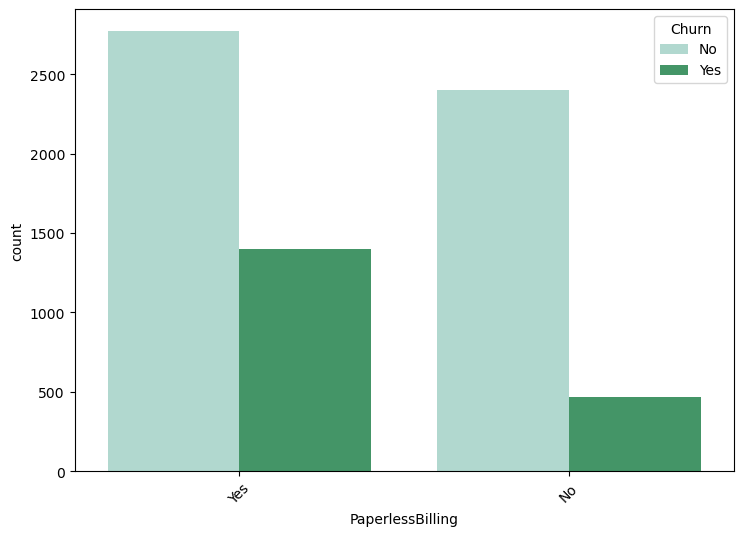

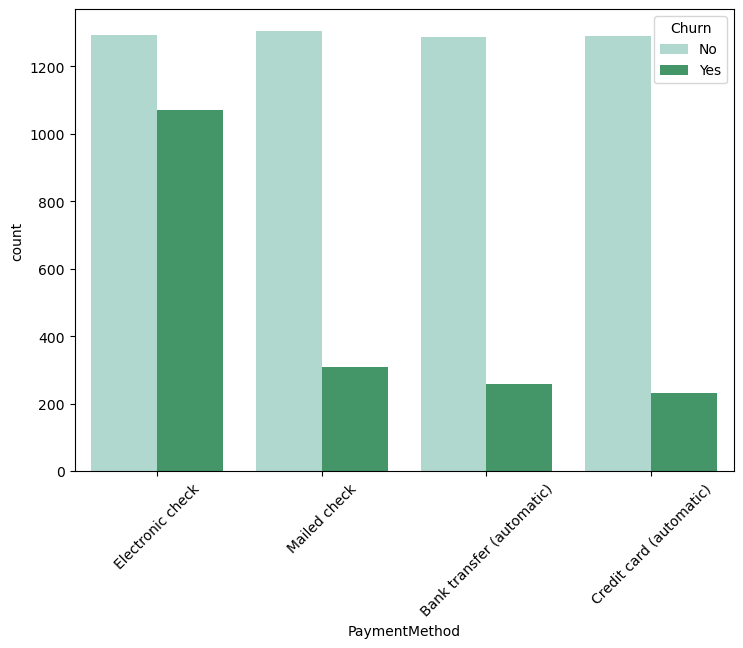

<Figure size 850x600 with 0 Axes>

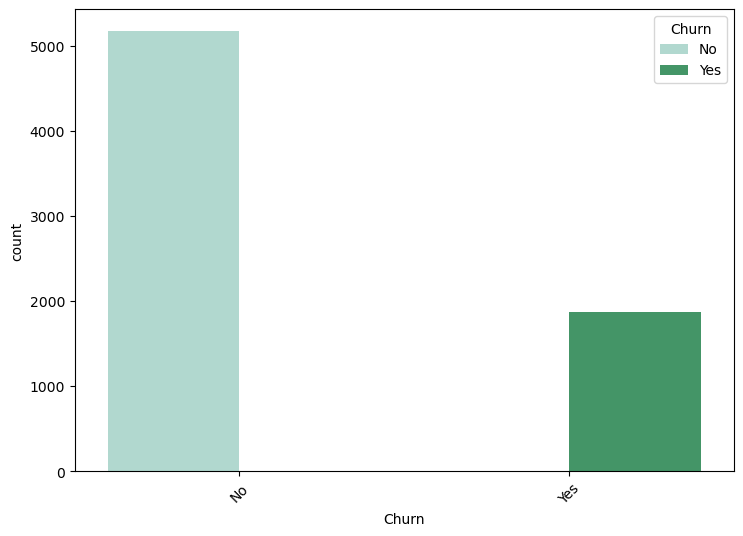

In [21]:
# Performing Univariate analysis on various featuers of the data in relation to customer churn rate 
for i, predictor in enumerate(df.drop(columns= ['MonthlyCharges', 'TotalCharges','customerID', 'tenure'])):
    plt.figure(figsize=(8.5, 6))
    plt.figure(i)
    plt.xticks(rotation= 45)
    sns.countplot(x= predictor, data= df, hue= 'Churn', palette='BuGn')

In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
pd.crosstab(df['PaymentMethod'], df['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [25]:
# Encoding all categorical values 
# df_dummies = pd.get_dummies(df.drop(columns=['TotalCharges', 'MonthlyCharges', 'customerID', 'tenure']))
# df_dummies

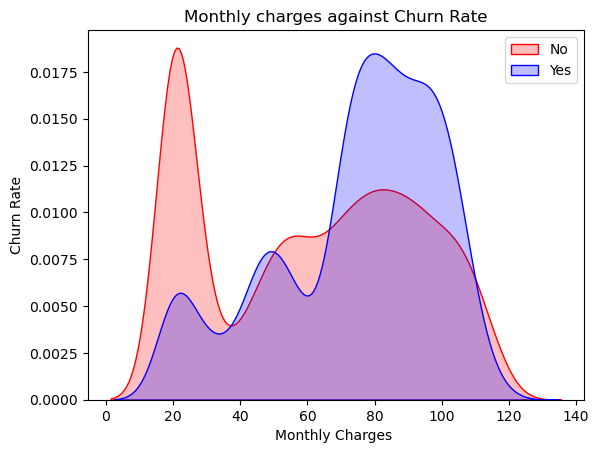

In [27]:
# checking relationship between Monthly charges and Churn rate 
plt.title('Monthly charges against Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('Monthly Charges ')
Churn = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'No')], color='Red', shade= True)
Churn = sns.kdeplot(df.MonthlyCharges[(df['Churn'] == 'Yes')], 
                                  ax= Churn, color='blue', shade= True)
plt.legend(['No', 'Yes'])

- Customers tend to churn at higher monthly charges compared to lower monthly charges

In [28]:
# Converting data into their appropriate datatypes
df['TotalCharges'] = df['TotalCharges'].astype('int', errors='ignore')

In [29]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [30]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

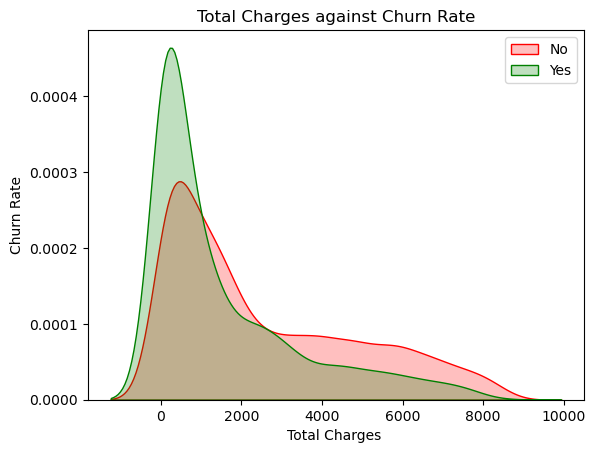

In [31]:
# Checking total charges against churn rate 
plt.title('Total Charges against Churn Rate')
plt.ylabel('Churn Rate')
plt.xlabel('Total Charges ')
Churn = sns.kdeplot(df.TotalCharges[(df['Churn'] == 'No')], color='Red', shade= True)
Churn = sns.kdeplot(df.TotalCharges[(df['Churn'] == 'Yes')], 
                                  ax= Churn, color='green', shade= True)
plt.legend(['No', 'Yes'])

In [35]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [36]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [37]:
df['Churn_encoded'] = encoder.fit_transform(df['Churn'])

In [38]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


<AxesSubplot:>

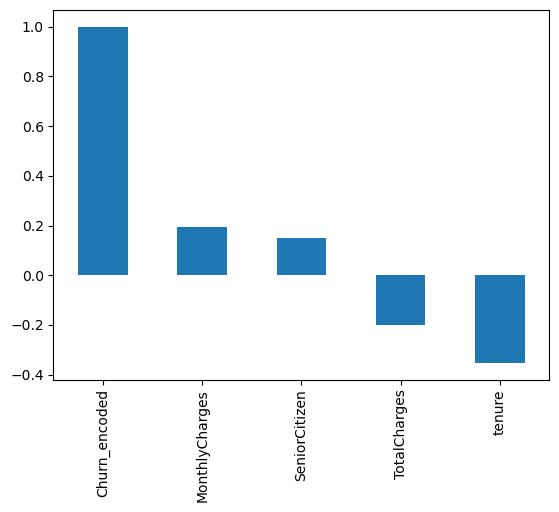

In [39]:
# Checking the correlation of predictors with churn 
df.corr()['Churn_encoded'].sort_values(ascending= False).plot(kind= 'bar')

In [42]:
df_dummies = pd.get_dummies(df.drop(columns= ['customerID','tenure', 'MonthlyCharges',
                                              'TotalCharges', 'Churn_encoded']))
df_dummies.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1


<AxesSubplot:>

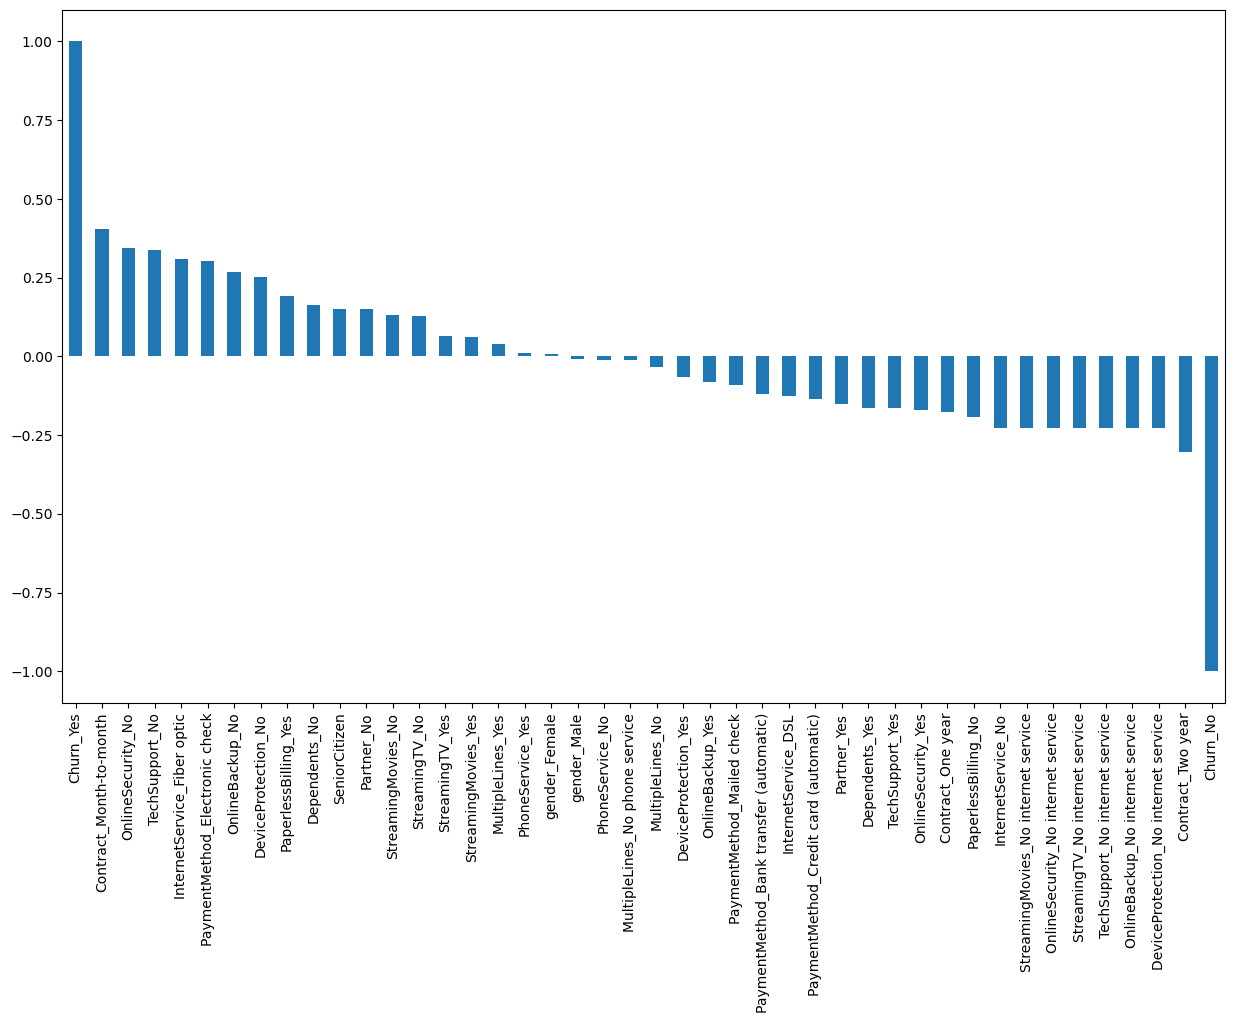

In [43]:
# Checking the correlation of predictors with churn 
plt.figure(figsize=(15, 9))
df_dummies.corr()['Churn_Yes' ].sort_values(ascending= False).plot(kind= 'bar')

- In instances of month-to-month Contract, No Online Security, No tech Support and others, Customers tend to churn.

- In instances of long term Contract, Device protection, Tech Support and others, Customers tend not to churn.

- Factors like gender, Multi-lines, and Phone service have little or no impact on customer churning 

<AxesSubplot:>

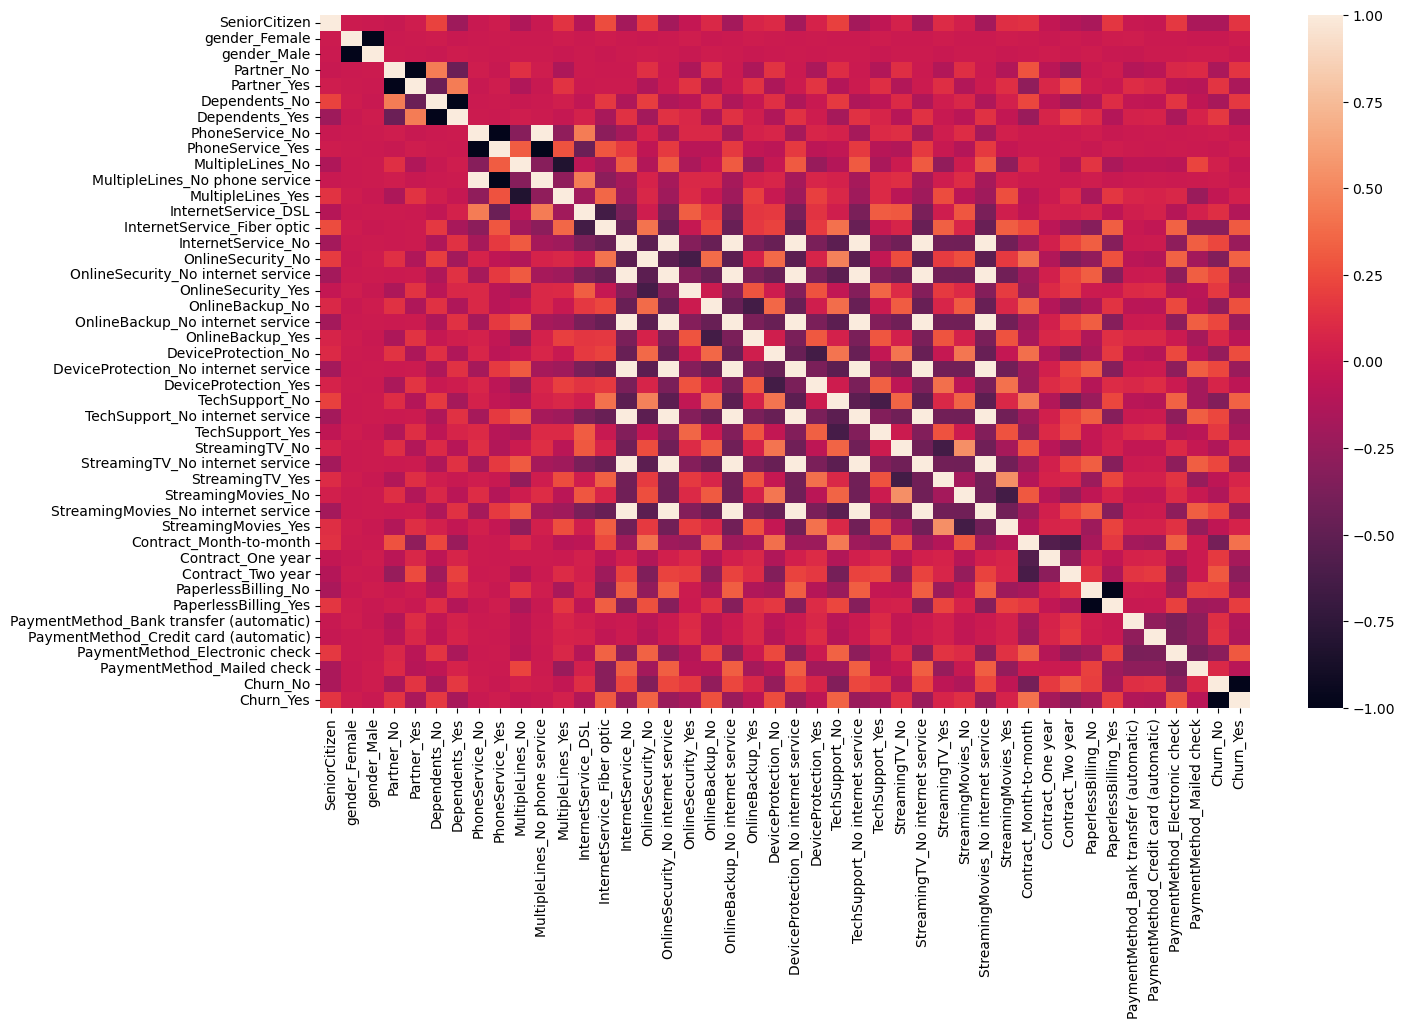

In [44]:
# Visualising correlation between various variables
plt.figure(figsize=(15,9))
sns.heatmap(df_dummies.corr())

## Univariate Analysis 

In [45]:
df_target0 = df.loc[df['Churn_encoded']==0]
df_target1 = df.loc[df['Churn_encoded']==1]

In [46]:
len(df_target0), len(df_target1)

(5174, 1869)

In [47]:
# Creating a function to plot the relationships between various categorical features and churn rate 
def uniplot(df, col, title, hue= None ):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data =hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 2 + 4*len(temp.unique())
    fig.set_size_inches(width, 6)
    plt.xticks(rotation= 45)
    plt.yscale('linear')
    plt.title(title)
    ax = sns.countplot(data= df, x= col, order= df[col].value_counts().index, hue= hue, palette= 'bright')
    
    plt.show()

In [48]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
Churn_encoded          2
dtype: int64

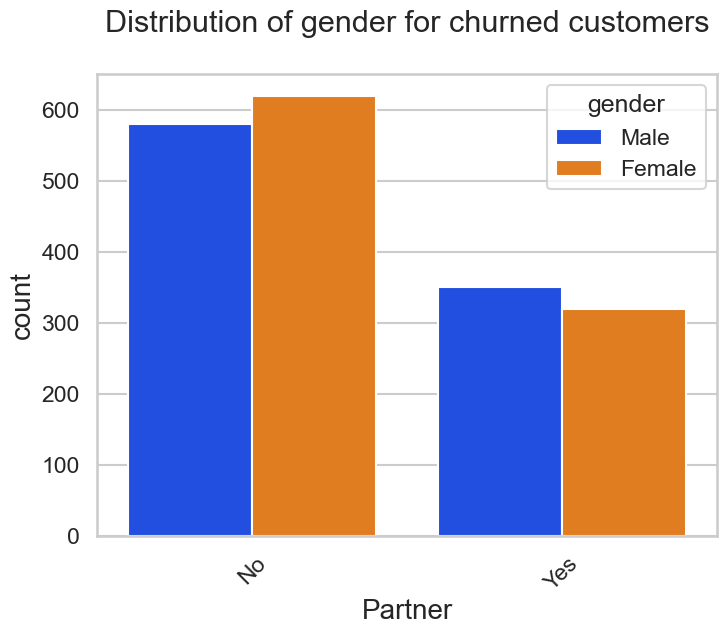

In [49]:
# Distribution of gender for Churned customers 
uniplot(df_target1, col= 'Partner', title= 'Distribution of gender for churned customers', hue= 'gender')

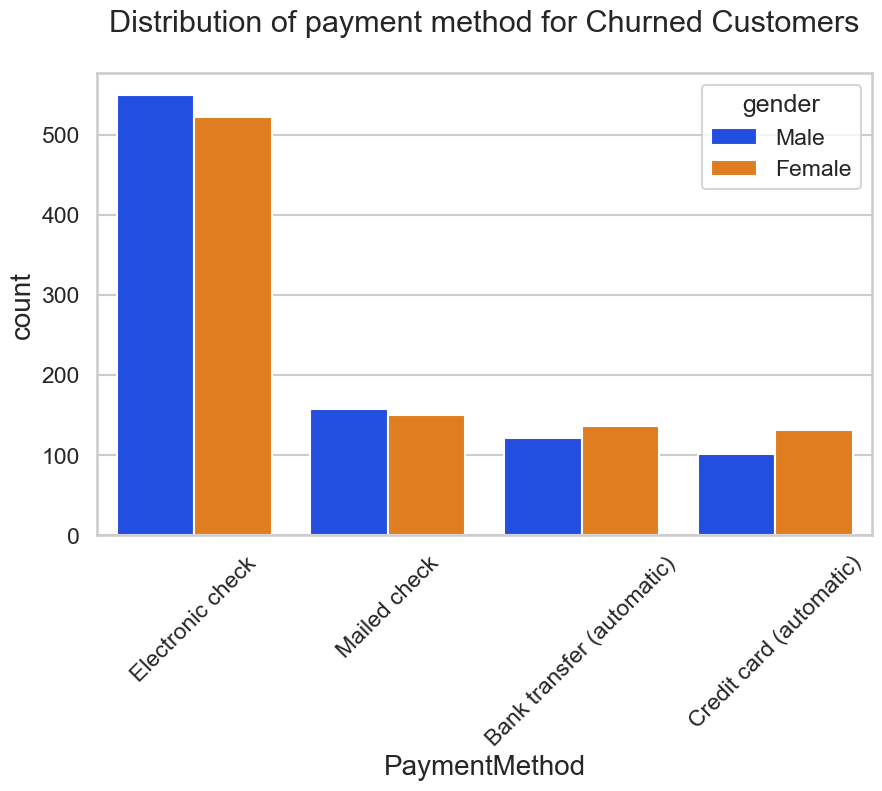

In [50]:
# Distribution of payment method for Churned customers 
uniplot(df_target1, col= 'PaymentMethod', title= 'Distribution of payment method for Churned Customers', hue= 'gender')

- Customers who use Electronic check form the highest churners however, the difference in terms of gender is not much 
- Credit card users are the least churners with females forming the highest portion

In [69]:
for i, column in enumerate(df.columns):
    print(df[column].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No     4072
Yes    2971
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    152

In [67]:
df['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

In [68]:
df['MultipleLines'].value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

## Prediction of Customer Churn

In [73]:
df_1 = df.drop('Churn_encoded', axis= 1)
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df_1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_encoded'],
      dtype='object')

In [77]:
# Separating dataframe into two dataframes to enable proper encoding
df_pred_1 = df_1[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']]
df_pred_1.head()

,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,29.85
1,5575-GNVDE,34,56.95,1889.50
2,3668-QPYBK,2,53.85,108.15
3,7795-CFOCW,45,42.30,1840.75
4,9237-HQITU,2,70.70,151.65


In [78]:
df_pred_3 = df_1.drop(columns= ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'])
df_pred_3.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [79]:
# # Encoding Categorical variables 
df_pred_2 = pd.get_dummies(df_pred_3, drop_first= True)
df_pred_2

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,0,0,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,0,1,1,1,1,1,0,0,0,...,1,0,1,1,0,1,1,0,0,0
7040,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [83]:
# Merging the cumerical features and the encoded categorical features 
df_pred = pd.concat([df_pred_1, df_pred_2], axis= 'columns')
df_pred

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.50,0,1,1,1,1,1,...,1,0,1,1,0,1,0,0,1,0
7039,2234-XADUH,72,103.20,7362.90,0,0,1,1,1,1,...,1,0,1,1,0,1,1,0,0,0
7040,4801-JZAZL,11,29.60,346.45,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,74.40,306.60,1,1,1,0,1,1,...,0,0,0,0,0,1,0,0,1,1


In [106]:
# Model training
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [95]:
x = df_pred.drop(['Churn_Yes','customerID'], axis= 1)

In [96]:
print(x)

      tenure  MonthlyCharges  TotalCharges  SeniorCitizen  gender_Male  \
0          1           29.85         29.85              0            0   
1         34           56.95       1889.50              0            1   
2          2           53.85        108.15              0            1   
3         45           42.30       1840.75              0            1   
4          2           70.70        151.65              0            0   
...      ...             ...           ...            ...          ...   
7038      24           84.80       1990.50              0            1   
7039      72          103.20       7362.90              0            0   
7040      11           29.60        346.45              0            0   
7041       4           74.40        306.60              1            1   
7042      66          105.65       6844.50              0            1   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  \
0               1               0    

In [97]:
y = df_pred['Churn_Yes']

In [98]:
# Splitting data into training data and testing data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 3)

In [111]:
# Hyperparameter tuning
model = XGBClassifier()
parameters = {'n_estimators':[100,200, 300],
    'max_depth':[10,50, 75],
    'learning_rate': [0.005, 0.05, 0.1]
    
}

In [112]:
tune = GridSearchCV(model, parameters)

In [113]:
tune.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [114]:
tune.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                        

In [115]:
tune.best_params_

{'learning_rate': 0.005, 'max_depth': 10, 'n_estimators': 300}

In [116]:
tune.best_score_

0.7909130166855529

In [128]:
test_pred = tune.predict(x_test)
Accuracy = accuracy_score(y_test, test_pred)
print('Testing data Accuracy is: ', round(Accuracy*100, 2),'%')

Testing data Accuracy is:  79.06 %


- The model is 79% percent accurate in predicting customer churnung rate 

In [129]:
train_pred = tune.predict(x_train)
accuracy = accuracy_score(y_train, train_pred)
print('Training data Accuracy is: ', round(accuracy*100, 2),'%')

Training data Accuracy is:  86.88 %


# Conclusion

- Key factors that affect churn rate are; 
 - Customer care quality
  - Cost of Service
  - Network quality


- It is advised that:
    -  Electronic payment method is improved/reviewed since it forms the highest churners.
    -  Technical support system should be enhanced.
    -  Attractive packages should be offered to short-term subscription customers to convert them to long-term. This will        maintain them and reduce their churning.
    -  Service packages should be offered to customers at highly competitive prices as possible.